# RNN Cell Directionality Analysis

This notebook analyzes the effect of different RNN directionality on model performance

## Import Library

In [27]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, TextVectorization, Embedding, Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

## Preparation

### Load Data from CSV

In [28]:
train_df = pd.read_csv('../../../data/nusax/train.csv')
valid_df = pd.read_csv('../../../data/nusax/valid.csv')

### Preprocess Data

In [29]:
max_tokens = 5000
max_sequence_length = 54
text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=max_sequence_length,
    standardize='lower_and_strip_punctuation'
)

text_vectorizer.adapt(train_df['text'].values)

label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
train_df['label'] = train_df['label'].map(label_map)
valid_df['label'] = valid_df['label'].map(label_map)

x_train = text_vectorizer(train_df['text'])
y_train = train_df['label']
x_val = text_vectorizer(valid_df['text'])
y_val = valid_df['label']

## Model Training

### Variant 1: Unidirectional RNN

In [30]:
model_1 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(64),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/30


/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3645 - loss: 1.0989 - val_accuracy: 0.4200 - val_loss: 1.0775
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6308 - loss: 0.8802 - val_accuracy: 0.5100 - val_loss: 1.0058
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8381 - loss: 0.6159 - val_accuracy: 0.5400 - val_loss: 1.0289
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9561 - loss: 0.3785 - val_accuracy: 0.5100 - val_loss: 1.0496
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9735 - loss: 0.2304 - val_accuracy: 0.5100 - val_loss: 1.1231
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9958 - loss: 0.1234 - val_accuracy: 0.5300 - val_loss: 1.2866
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9926 - loss: 0.0874 - val_accuracy: 0.5400 - val_loss: 1.3977
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9982 - loss: 0.0513 - val_accuracy: 0.4700 - val_loss: 1.5280
Epoch 9/30
8/8 ━━━

### Variant 2: Bidirectional RNN

In [31]:
model_2 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    Bidirectional(SimpleRNN(64)),
    Dense(3, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3924 - loss: 1.0803 - val_accuracy: 0.4300 - val_loss: 0.9891
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6780 - loss: 0.8079 - val_accuracy: 0.4700 - val_loss: 1.0327
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8947 - loss: 0.5271 - val_accuracy: 0.5400 - val_loss: 1.0034
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9892 - loss: 0.2526 - val_accuracy: 0.4900 - val_loss: 1.0336
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9982 - loss: 0.1082 - val_accuracy: 0.5600 - val_loss: 1.0404
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9982 - loss: 0.0462 - val_accuracy: 0.5900 - val_loss: 1.0586
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0249 - val_accuracy: 0.5000 - val_loss: 1.1103
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 0.5700 - val_loss: 1.1172
Epoc

## Model Evaluation

In [32]:
def evaluate_model(model, x_val, y_val, history):
    y_pred = model.predict(x_val)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_val, y_pred_classes, average='macro')
    print(classification_report(y_val, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluate Training Loss and Validation Loss for Each Model

#### Model 1


Evaluating Model 1 (Unidirectional RNN):
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x148a108b0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.57      0.61      0.59        38
           1       0.42      0.67      0.52        24


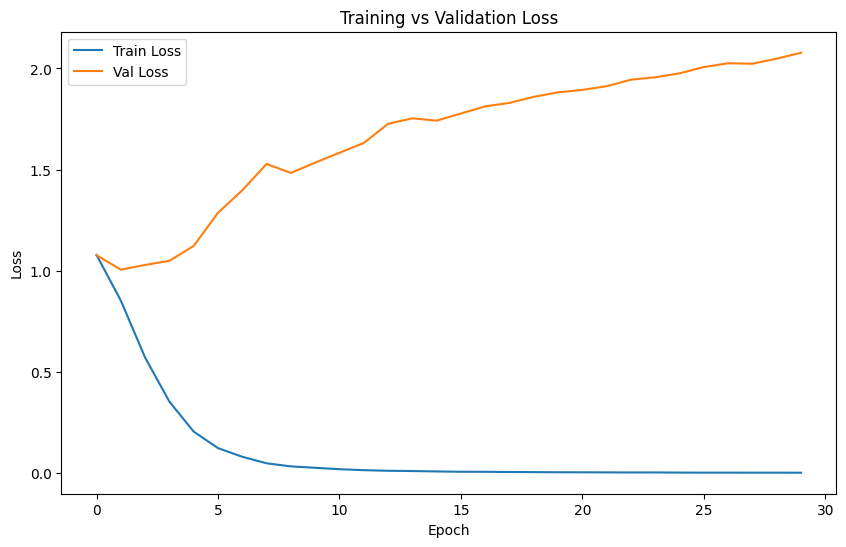

In [33]:
print("\nEvaluating Model 1 (Unidirectional RNN):")
f1_1 = evaluate_model(model_1, x_val, y_val, history_1)

#### Model 2


Evaluating Model 2 (Bidirectional RNN):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
              precision    recall  f1-score   support

           0       0.55      0.61      0.57        38
           1       0.57      0.33      0.42        24
           2       0.45      0.53      0.49        38

    accuracy                           0.51       100
   macro avg       0.52      0.49      0.49       100
weighted avg       0.52      0.51      0.50       100

Macro F1-score: 0.4946


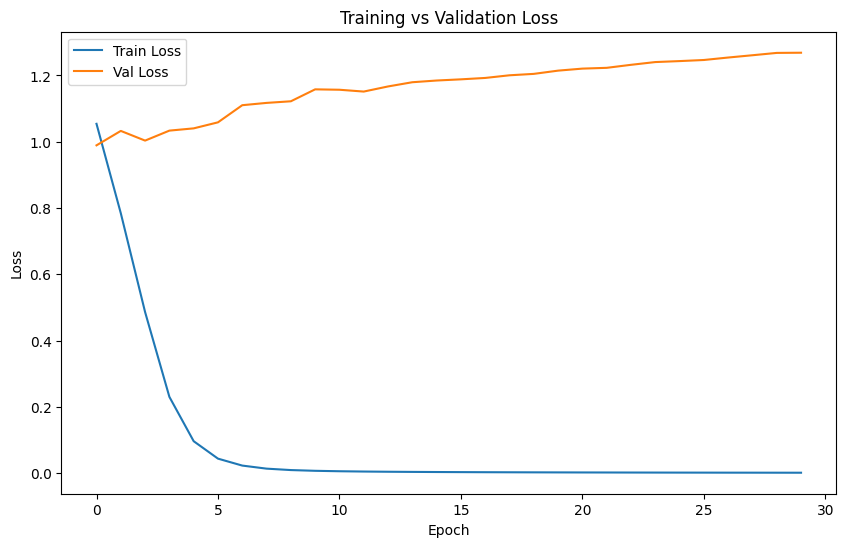

In [34]:
print("\nEvaluating Model 2 (Bidirectional RNN):")
f1_2 = evaluate_model(model_2, x_val, y_val, history_2)

### Validation Loss Comparison

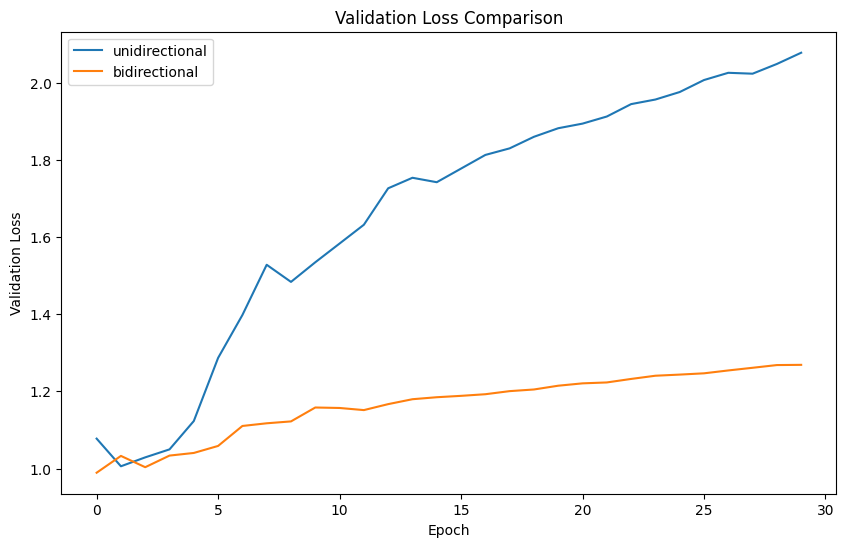

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['val_loss'], label='unidirectional')
plt.plot(history_2.history['val_loss'], label='bidirectional')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

### Training Loss Comparison

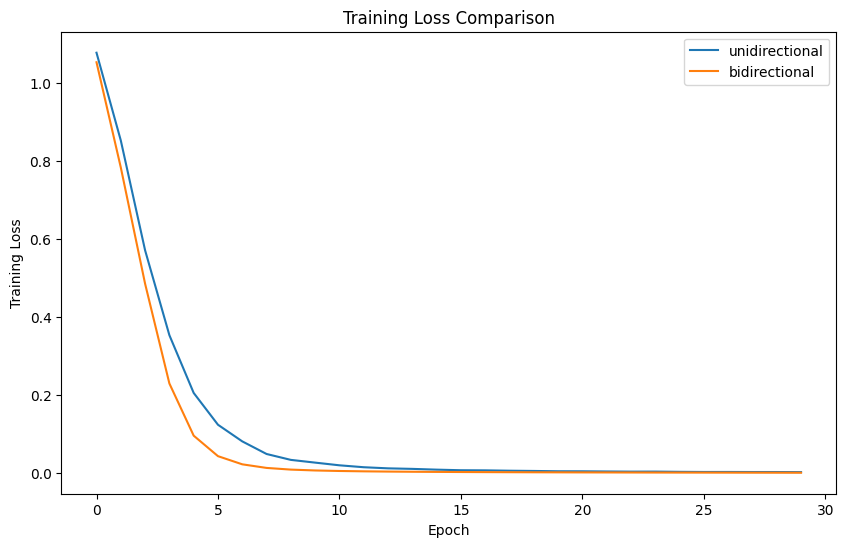

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='unidirectional')
plt.plot(history_2.history['loss'], label='bidirectional')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

### Accuracy Comparison

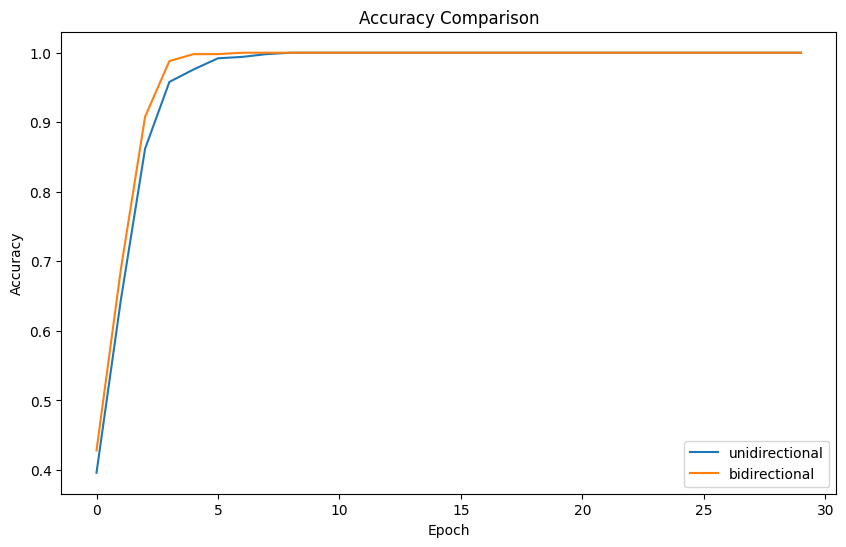

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['accuracy'], label='unidirectional')
plt.plot(history_2.history['accuracy'], label='bidirectional')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### F1 Score Comparison

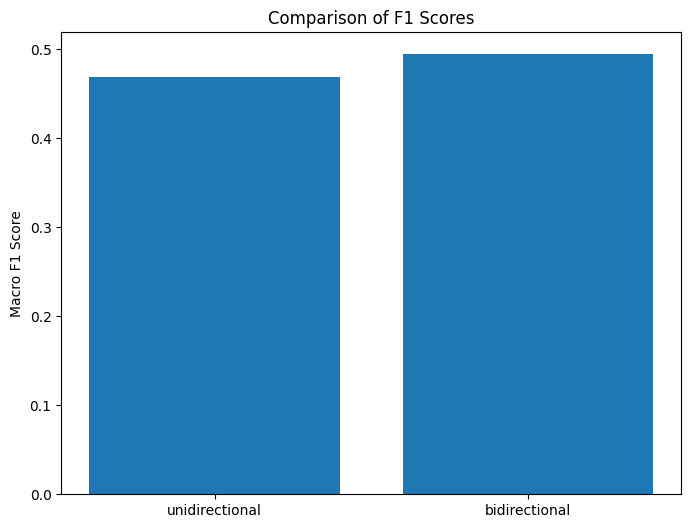

In [38]:
plt.figure(figsize=(8, 6))
plt.bar(['unidirectional', 'bidirectional'], [f1_1, f1_2])
plt.title('Comparison of F1 Scores')
plt.ylabel('Macro F1 Score')
plt.show()